In [272]:
import requests
import csv
from matplotlib import pyplot as plt

In [672]:
page = requests.get("https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=100&ref_=adv_nxt")
page.status_code # This object has a status_code property, which indicates if the page was downloaded successfully

200

In [673]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [674]:
p = soup.find(class_='lister list detail sub-list')
#print("paragraph in outer text=", p)

In [675]:
new=p.find_all(class_="lister-item-content")

In [676]:
new

[<div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">100.</span>
 <a href="/title/tt0112573/">Braveheart</a>
 <span class="lister-item-year text-muted unbold">(1995)</span>
 </h3>
 <p class="text-muted ">
 <span class="certificate">R</span>
 <span class="ghost">|</span>
 <span class="runtime">178 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Biography, Drama, History            </span>
 </p>
 <div class="ratings-bar">
 <div class="inline-block ratings-imdb-rating" data-value="8.3" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>8.3</strong>
 </div>
 <div class="inline-block ratings-user-rating">
 <span class="userRatingValue" data-tconst="tt0112573" id="urv_tt0112573">
 <span class="global-sprite rating-star no-rating"></span>
 <span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
 </span>
 <div class="starBarWidget" id="sb_tt0112573">

In [677]:
"""with open('movies_file.csv', 'w', newline='',encoding='utf-8') as csvfile:
        fnames = ['movie_title','movie_genre','movie_director',
                                       'release_year','movie_runtime','votes','star','rating','gross']
        writer = csv.DictWriter(csvfile, fieldnames=fnames)

        writer.writeheader()
csvfile.close()"""

"with open('movies_file.csv', 'w', newline='',encoding='utf-8') as csvfile:\n        fnames = ['movie_title','movie_genre','movie_director',\n                                       'release_year','movie_runtime','votes','star','rating','gross']\n        writer = csv.DictWriter(csvfile, fieldnames=fnames)\n\n        writer.writeheader()\ncsvfile.close()"

In [678]:
for item in new:
    runtime = item.find(class_="runtime").get_text()
    genre = item.find(class_="genre").get_text()
    title = item.find(class_="lister-item-header").find("a").get_text()
    year=item.find(class_="lister-item-year text-muted unbold").get_text()
    rating=item.find(class_="inline-block ratings-imdb-rating").get_text()
    #votes=item.find(class_="sort-num_votes-visible").find_all('span', {"name": 'nv'})[0].get_text()
    r=[]
    r=item.find(class_="sort-num_votes-visible").find_all('span', {"name": 'nv'})
    if(len(r)==2):
        votes=item.find(class_="sort-num_votes-visible").find_all('span', {"name": 'nv'})[0].get_text()
        box=item.find(class_="sort-num_votes-visible").find_all('span', {"name": 'nv'})[1].get_text()
    else:
        box=None
        #box=item.find(class_="sort-num_votes-visible").find_all('span', {"name": 'nv'})[1].get_text()
    #Box_office_earnings=item.find(class_="sort-num_votes-visible").find_all('span')[2].get_text()
    dir=item.find_all('p',class_="")[1].find_all('a')[0].get_text()
    #writer.writerow({'movie_title' : title, 'movie_genre': genre,'movie_director':dir,'release_year':year,'movie_runtime':runtime,'votes':votes,'box_office_earnings':'','rating':rating})
    stars=[]
    stars.append(item.find_all('p',class_="")[1].find_all()[2].get_text())
    stars.append(item.find_all('p',class_="")[1].find_all()[3].get_text())
    stars.append(item.find_all('p',class_="")[1].find_all()[4].get_text())
    stars.append(item.find_all('p',class_="")[1].find_all()[5].get_text())
    #df = pd.DataFrame([runtime,genre,year,rating,votes,dir,title],columns = ['A', 'B', 'C', 'D','E','F','G'])

    

    
    
    with open('movies_file.csv', 'a', newline='',encoding='utf-8') as csvfile:
        fnames = ['movie_title','movie_genre','movie_director',
                                       'release_year','movie_runtime','votes','star','rating','gross']
        writer = csv.DictWriter(csvfile, fieldnames=fnames)

        #writer.writeheader()
        writer.writerow({'movie_title' : title, 'movie_genre': genre,'movie_director':dir,'release_year':year,
                    'movie_runtime':runtime,'votes':votes,'star':stars,'rating':rating,'gross':box})


    
    print(title)
    print(runtime)
    print(genre)
    print(rating)
    print(year)
    print("votes :",votes)
    print("Box ",box)
    print("dir : ",dir)
    #file.close()
    print(stars)
    #print(r)
    

    print(10*'-')

Braveheart
178 min

Biography, Drama, History            


8.3

(1995)
votes : 922,552
Box  $75.60M
dir :  Mel Gibson
['Mel Gibson', 'Sophie Marceau', 'Patrick McGoohan', 'Angus Macfadyen']
----------
Reservoir Dogs
99 min

Crime, Drama, Thriller            


8.3

(1992)
votes : 871,825
Box  $2.83M
dir :  Quentin Tarantino
['Harvey Keitel', 'Tim Roth', 'Michael Madsen', 'Chris Penn']
----------
Full Metal Jacket
116 min

Drama, War            


8.3

(1987)
votes : 639,643
Box  $46.36M
dir :  Stanley Kubrick
['Matthew Modine', 'R. Lee Ermey', "Vincent D'Onofrio", 'Adam Baldwin']
----------
Idi i smotri
142 min

Drama, War            


8.3

(1985)
votes : 639,643
Box  None
dir :  Elem Klimov
['Aleksey Kravchenko', 'Olga Mironova', 'Liubomiras Laucevicius', 'Vladas Bagdonas']
----------
Aliens
137 min

Action, Adventure, Sci-Fi            


8.3

(1986)
votes : 624,510
Box  $85.16M
dir :  James Cameron
['Sigourney Weaver', 'Michael Biehn', 'Carrie Henn', 'Paul Reiser']
----------
Amad

The Wolf of Wall Street
180 min

Biography, Crime, Drama            


8.2

(2013)
votes : 1,097,074
Box  $116.90M
dir :  Martin Scorsese
['Leonardo DiCaprio', 'Jonah Hill', 'Margot Robbie', 'Matthew McConaughey']
----------
Chak De! India
153 min

Drama, Family, Sport            


8.2

(2007)
votes : 69,590
Box  $1.11M
dir :  Shimit Amin
['Shah Rukh Khan', 'Vidya Malvade', 'Sagarika Ghatge', 'Shilpa Shukla']
----------
There Will Be Blood
158 min

Drama            


8.2

(2007)
votes : 485,812
Box  $40.22M
dir :  Paul Thomas Anderson
['Daniel Day-Lewis', 'Paul Dano', 'Ciarán Hinds', 'Martin Stringer']
----------
Pan's Labyrinth
118 min

Drama, Fantasy, War            


8.2

(2006)
votes : 592,972
Box  $37.63M
dir :  Guillermo del Toro
['Ivana Baquero', 'Ariadna Gil', 'Sergi López', 'Maribel Verdú']
----------
V for Vendetta
132 min

Action, Drama, Sci-Fi            


8.2

(2005)
votes : 985,343
Box  $70.51M
dir :  James McTeigue
['Hugo Weaving', 'Natalie Portman', 'Rupert Graves',

Room
118 min

Drama, Thriller            


8.1

(I) (2015)
votes : 340,239
Box  $14.68M
dir :  Lenny Abrahamson
['Brie Larson', 'Jacob Tremblay', 'Sean Bridgers', 'Wendy Crewson']
----------
Relatos salvajes
122 min

Comedy, Drama, Thriller            


8.1

(2014)
votes : 161,699
Box  $3.11M
dir :  Damián Szifron
['Darío Grandinetti', 'María Marull', 'Mónica Villa', 'Diego Starosta']
----------
Bahubali: The Beginning
159 min

Action, Drama            


8.1

(2015)
votes : 97,086
Box  $6.74M
dir :  S.S. Rajamouli
['Prabhas', 'Rana Daggubati', 'Ramya Krishnan', 'Sathyaraj']
----------


In [679]:
df = pd.read_csv('movies_file.csv')

In [680]:
df.head()

movie_title  \
0                       The Shawshank Redemption   
1                                  The Godfather   
2                                The Dark Knight   
3                         The Godfather: Part II   
4  The Lord of the Rings: The Return of the King   

                               movie_genre        movie_director release_year  \
0                      \nDrama                    Frank Darabont       (1994)   
1               \nCrime, Drama              Francis Ford Coppola       (1972)   
2       \nAction, Crime, Drama                 Christopher Nolan       (2008)   
3               \nCrime, Drama              Francis Ford Coppola       (1974)   
4  \nAdventure, Drama, Fantasy                     Peter Jackson       (2003)   

  movie_runtime      votes                                               star  \
0       142 min  2,202,879  ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...   
1       175 min  1,517,741  ['Marlon Brando', 'Al Pacino', 'James Caan', '...   
2       152 min  2,184,043  ['Christian Bale', 'Heath Ledger', 'Aaron Eckh...   
3       202 min  1,063,272  ['Al Pacino', 'Robert De Niro', 'Robert Duvall...   
4       201 min  1,565,413  ['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...   

   rating     gross  
0     9.3   $28.34M  
1     9.2  $134.97M  
2     9.0  $534.86M  
3     9.0   $57.30M  
4     8.9  $377.85M

In [681]:
#count nan values
print(df.isnull().sum())

movie_title         0
movie_genre         0
movie_director      0
release_year        0
movie_runtime       0
votes               0
star                0
rating              0
gross             156
dtype: int64


In [696]:
#drop nan
df1 = df.dropna() 
print("remove the rows where at least one element is missing:")
print(df1)

remove the rows where at least one element is missing:
                                            movie_title  \
0                              The Shawshank Redemption   
1                                         The Godfather   
2                                       The Dark Knight   
3                                The Godfather: Part II   
4         The Lord of the Rings: The Return of the King   
5                                          Pulp Fiction   
6                                      Schindler's List   
7                                          12 Angry Men   
8                                             Inception   
9                                            Fight Club   
10    The Lord of the Rings: The Fellowship of the Ring   
11                                         Forrest Gump   
12                      Il buono, il brutto, il cattivo   
13                The Lord of the Rings: The Two Towers   
14                                           The Matrix   
1

In [697]:
print(df1.isnull().sum())

movie_title       0
movie_genre       0
movie_director    0
release_year      0
movie_runtime     0
votes             0
star              0
rating            0
gross             0
dtype: int64


In [698]:
#remove duplicate
df.duplicated()
print("remove duplicate rows:")
df.drop_duplicates()

remove duplicate rows:


movie_title  \
0                              The Shawshank Redemption   
1                                         The Godfather   
2                                       The Dark Knight   
3                                The Godfather: Part II   
4         The Lord of the Rings: The Return of the King   
5                                          Pulp Fiction   
6                                      Schindler's List   
7                                          12 Angry Men   
8                                             Inception   
9                                            Fight Club   
10    The Lord of the Rings: The Fellowship of the Ring   
11                                         Forrest Gump   
12                      Il buono, il brutto, il cattivo   
13                The Lord of the Rings: The Two Towers   
14                                           The Matrix   
15                                           Goodfellas   
16       Star Wars: Episode V - The Empire Strikes Back   
17                      One Flew Over the Cuckoo's Nest   
18                                              Seppuku   
19                                         Gisaengchung   
20                                         Interstellar   
21                                       Cidade de Deus   
22                        Sen to Chihiro no kamikakushi   
23                                  Saving Private Ryan   
24                                       The Green Mile   
25                                      La vita è bella   
26                                                Se7en   
27                             The Silence of the Lambs   
28                                            Star Wars   
29                                 Shichinin no samurai   
...                                                 ...   
971                                         The Message   
972                                              Sholay   
973                     Monty Python and the Holy Grail   
974                                           Chinatown   
975                                       Andrei Rublev   
976                                    The Great Escape   
977                               To Kill a Mockingbird   
978                                             Yôjinbô   
979                               Judgment at Nuremberg   
980                                    Some Like It Hot   
981                                     Smultronstället   
982                                 Det sjunde inseglet   
983                                   Dial M for Murder   
984                                    Tôkyô monogatari   
985                                            Rashômon   
986                                       All About Eve   
987                    The Treasure of the Sierra Madre   
988                                       The Red Shoes   
989                                       The Gold Rush   
990                                        Sherlock Jr.   
991                                       The Gentlemen   
992                                                Pink   
993                                        Contratiempo   
994                                           Ah-ga-ssi   
995                                               Mommy   
996                                              Haider   
997                                               Logan   
998                                                Room   
999                                    Relatos salvajes   
1000                            Bahubali: The Beginning   

                                     movie_genre           movie_director  \
0                            \nDrama                       Frank Darabont   
1                     \nCrime, Drama                 Francis Ford Coppola   
2             \nAction, Crime, Drama                    Christopher Nolan   
3                     \nCrime, Drama                 Francis Ford Coppola   


In [ ]:
#fix all value

# Data Analysis

In [334]:
sub=df.iloc[0:10]

In [335]:
sub

movie_title  \
0                       The Shawshank Redemption   
1                                  The Godfather   
2                                The Dark Knight   
3                         The Godfather: Part II   
4  The Lord of the Rings: The Return of the King   
5                                   Pulp Fiction   
6                               Schindler's List   
7                                   12 Angry Men   
8                                      Inception   
9                                     Fight Club   

                               movie_genre        movie_director release_year  \
0                      \nDrama                    Frank Darabont       (1994)   
1               \nCrime, Drama              Francis Ford Coppola       (1972)   
2       \nAction, Crime, Drama                 Christopher Nolan       (2008)   
3               \nCrime, Drama              Francis Ford Coppola       (1974)   
4  \nAdventure, Drama, Fantasy                     Peter Jackson       (2003)   
5               \nCrime, Drama                 Quentin Tarantino       (1994)   
6  \nBiography, Drama, History                  Steven Spielberg       (1993)   
7                      \nDrama                      Sidney Lumet       (1957)   
8  \nAction, Adventure, Sci-Fi                 Christopher Nolan       (2010)   
9                      \nDrama                     David Fincher       (1999)   

  movie_runtime      votes                                               star  \
0       142 min  2,202,638  ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...   
1       175 min  1,517,610  ['Marlon Brando', 'Al Pacino', 'James Caan', '...   
2       152 min  2,183,831  ['Christian Bale', 'Heath Ledger', 'Aaron Eckh...   
3       202 min  1,063,170  ['Al Pacino', 'Robert De Niro', 'Robert Duvall...   
4       201 min  1,565,292  ['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...   
5       154 min  1,730,829  ['John Travolta', 'Uma Thurman', 'Samuel L. Ja...   
6       195 min  1,149,349  ['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...   
7        96 min    643,256  ['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam'...   
8       148 min  1,932,751  ['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...   
9       139 min  1,759,055  ['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...   

   rating  
0     9.3  
1     9.2  
2     9.0  
3     9.0  
4     8.9  
5     8.9  
6     8.9  
7     8.9  
8     8.8  
9     8.8

In [337]:
df['movie_runtime'] = df['movie_runtime'].str.replace('[a-z]', '')

In [344]:
df['release_year']=df['release_year'].str.replace('(','')

In [347]:
df['release_year']=df['release_year'].str.replace(')','')

In [348]:
df['movie_genre']=df['movie_genre'].str.replace('\n','')

In [349]:
df.head()

movie_title  \
0                       The Shawshank Redemption   
1                                  The Godfather   
2                                The Dark Knight   
3                         The Godfather: Part II   
4  The Lord of the Rings: The Return of the King   

                             movie_genre        movie_director release_year  \
0                      Drama                    Frank Darabont         1994   
1               Crime, Drama              Francis Ford Coppola         1972   
2       Action, Crime, Drama                 Christopher Nolan         2008   
3               Crime, Drama              Francis Ford Coppola         1974   
4  Adventure, Drama, Fantasy                     Peter Jackson         2003   

  movie_runtime      votes                                               star  \
0          142   2,202,638  ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...   
1          175   1,517,610  ['Marlon Brando', 'Al Pacino', 'James Caan', '...   
2          152   2,183,831  ['Christian Bale', 'Heath Ledger', 'Aaron Eckh...   
3          202   1,063,170  ['Al Pacino', 'Robert De Niro', 'Robert Duvall...   
4          201   1,565,292  ['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...   

   rating  
0     9.3  
1     9.2  
2     9.0  
3     9.0  
4     8.9

In [362]:
df=df.sort_values(by = ['rating'], ascending=False)[:10]
df

movie_title  \
0                            The Shawshank Redemption   
1                                       The Godfather   
2                                     The Dark Knight   
3                              The Godfather: Part II   
4       The Lord of the Rings: The Return of the King   
5                                        Pulp Fiction   
6                                    Schindler's List   
7                                        12 Angry Men   
10  The Lord of the Rings: The Fellowship of the Ring   
11                                       Forrest Gump   

                              movie_genre        movie_director release_year  \
0                       Drama                    Frank Darabont         1994   
1                Crime, Drama              Francis Ford Coppola         1972   
2        Action, Crime, Drama                 Christopher Nolan         2008   
3                Crime, Drama              Francis Ford Coppola         1974   
4   Adventure, Drama, Fantasy                     Peter Jackson         2003   
5                Crime, Drama                 Quentin Tarantino         1994   
6   Biography, Drama, History                  Steven Spielberg         1993   
7                       Drama                      Sidney Lumet         1957   
10   Action, Adventure, Drama                     Peter Jackson         2001   
11             Drama, Romance                   Robert Zemeckis         1994   

   movie_runtime      votes  \
0           142   2,202,638   
1           175   1,517,610   
2           152   2,183,831   
3           202   1,063,170   
4           201   1,565,292   
5           154   1,730,829   
6           195   1,149,349   
7            96     643,256   
10          178   1,577,221   
11          142   1,700,282   

                                                 star  rating  
0   ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...     9.3  
1   ['Marlon Brando', 'Al Pacino', 'James Caan', '...     9.2  
2   ['Christian Bale', 'Heath Ledger', 'Aaron Eckh...     9.0  
3   ['Al Pacino', 'Robert De Niro', 'Robert Duvall...     9.0  
4   ['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...     8.9  
5   ['John Travolta', 'Uma Thurman', 'Samuel L. Ja...     8.9  
6   ['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...     8.9  
7   ['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam'...     8.9  
10  ['Elijah Wood', 'Ian McKellen', 'Orlando Bloom...     8.8  
11  ['Tom Hanks', 'Robin Wright', 'Gary Sinise', '...     8.8

In [375]:
sub=df.iloc[0:10,7]

"plt.bar(labels,values,bar_width, alpha =opacity ,color = 'y', label= 'Top 10 movies run_time' )\nplt.xticks(rotation=90)\nplt.xlabel('MOVIES')\nplt.ylabel('RUN_TIME')\nplt.legend()\nplt.show()"

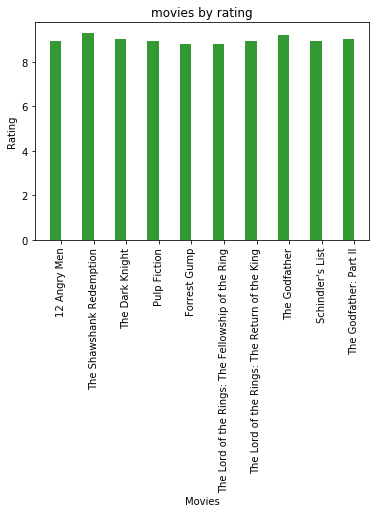

In [376]:
import numpy as np
n_groups = 10
means_frank = sub
#means_guido = (85, 62, 54, 20)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='g',
label='Frank')

plt.xticks(index+bar_width/2, df['movie_title'],rotation=90)


plt.xlabel('Movies')
plt.ylabel('Rating')
plt.title('movies by rating')


"""plt.bar(labels,values,bar_width, alpha =opacity ,color = 'y', label= 'Top 10 movies run_time' )
plt.xticks(rotation=90)
plt.xlabel('MOVIES')
plt.ylabel('RUN_TIME')
plt.legend()
plt.show()"""

In [373]:
df=df.sort_values(by = ['votes'], ascending=False)[:10]

In [377]:
sub=df.iloc[0:10,5]

In [379]:
sub.head()

7       643,256
0     2,202,638
2     2,183,831
5     1,730,829
11    1,700,282
Name: votes, dtype: object

"plt.bar(labels,values,bar_width, alpha =opacity ,color = 'y', label= 'Top 10 movies run_time' )\nplt.xticks(rotation=90)\nplt.xlabel('MOVIES')\nplt.ylabel('RUN_TIME')\nplt.legend()\nplt.show()"

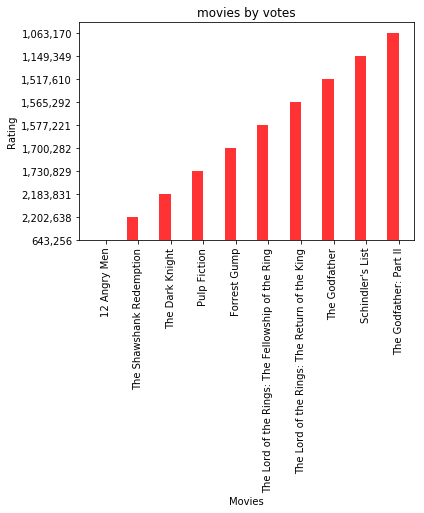

In [381]:
import numpy as np
n_groups = 10
means_frank = sub
#means_guido = (85, 62, 54, 20)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='r',
label='Frank')

plt.xticks(index+bar_width/2, df['movie_title'],rotation=90)


plt.xlabel('Movies')
plt.ylabel('Rating')
plt.title('movies by votes')


"""plt.bar(labels,values,bar_width, alpha =opacity ,color = 'y', label= 'Top 10 movies run_time' )
plt.xticks(rotation=90)
plt.xlabel('MOVIES')
plt.ylabel('RUN_TIME')
plt.legend()
plt.show()"""

#Show number of movies per year (line graph)


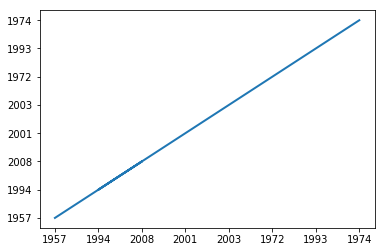

In [388]:
plt.plot(df['release_year'], df['release_year'], linewidth=2)
plt.show()


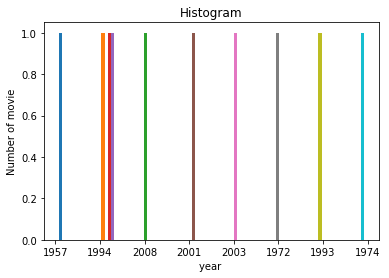

In [392]:
population_age= df['release_year']
bins = df['release_year'].nunique(dropna=True)
plt.hist(population_age, bins, rwidth=0.8)
plt.xlabel('year ')
plt.ylabel('Number of movie')
plt.title('Histogram')
plt.show()

In [397]:
df['movie_director'].count()

100

Text(0.5, 1.0, 'movies per dictor')

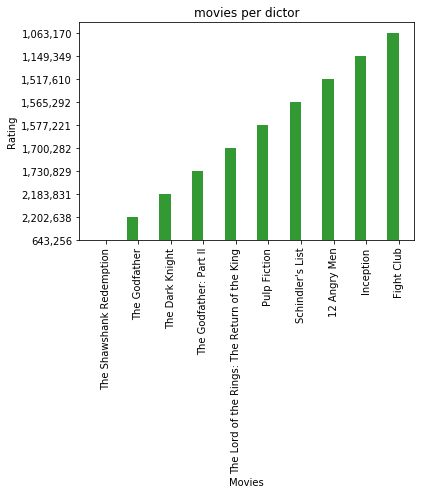

In [401]:
n_groups = 10
#directors
movies =df.iloc[:,2] 
#means_guido = (85, 62, 54, 20)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='g',
label='Frank')

plt.xticks(index+bar_width/2, df['movie_title'],rotation=90)


plt.xlabel('Movies')
plt.ylabel('Rating')
plt.title('movies per dictor')



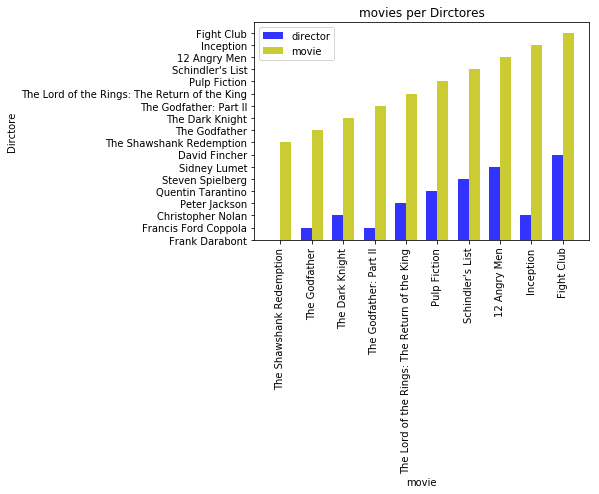

In [426]:


# data to plot
n_groups = 10
means_frank = df['movie_director'][:10]
means_guido = df['movie_title'][:10]

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='director')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='y',
label='movie')

plt.xlabel('movie')
plt.ylabel('Dirctore')
plt.title('movies per Dirctores')
plt.xticks(index+bar_width/2, df['movie_title'],rotation=90)
plt.legend()
plt.show()

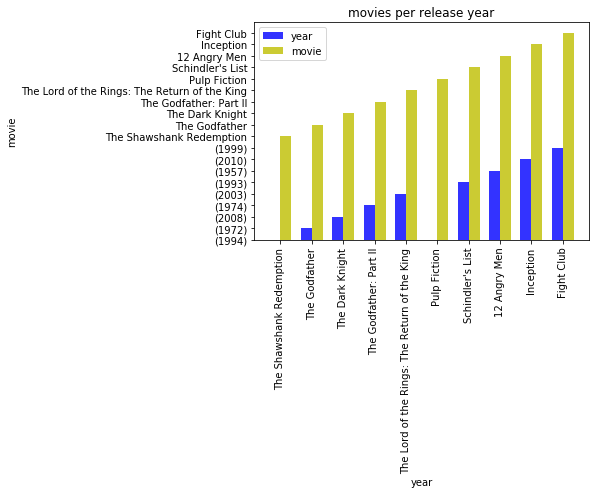

In [425]:


# data to plot
n_groups = 10
means_frank = df['release_year'][:10]
means_guido = df['movie_title'][:10]

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='year')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='y',
label='movie')

plt.xlabel('year')
plt.ylabel('movie')
plt.title('movies per release year')
plt.xticks(index+bar_width/2, df['movie_title'],rotation=90)
plt.legend()
plt.show()

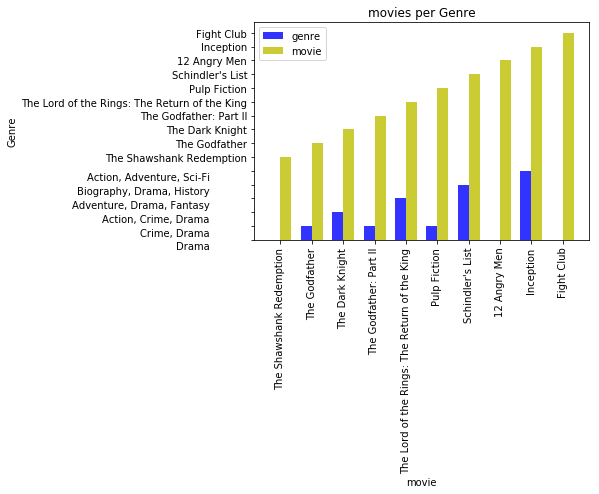

In [424]:


# data to plot
n_groups = 10
means_frank = df['movie_genre'][:10]
means_guido = df['movie_title'][:10]

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='genre')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='y',
label='movie')

plt.xlabel('movie')
plt.ylabel('Genre')
plt.title('movies per Genre')
plt.xticks(index+bar_width/2, df['movie_title'],rotation=90)
plt.legend()
plt.show()